In [1]:
# required libraries 
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import pandas as pd
pn.extension("katex")
import ipywidgets as widgets

#from IPython.display import Image, Video

#import warnings
#warnings.filterwarnings('ignore')

Row
    [0] PNG(str, width=250)
    [1] PNG(str, width=275)
    [2] PNG(str, width=280)
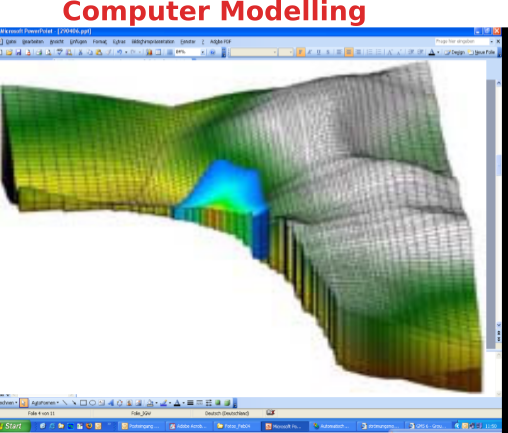
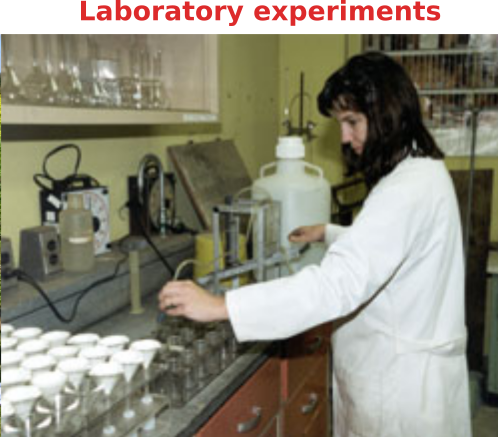
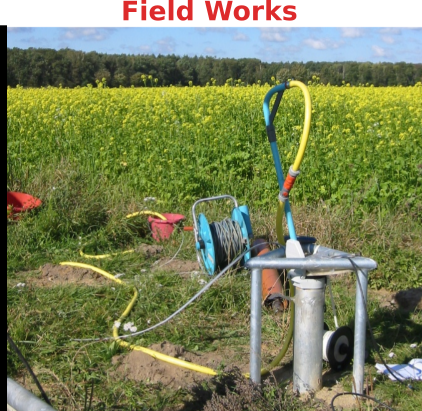

In [2]:
im1 = pn.pane.PNG("images/L01_f_1c.png", width=250)
im2 = pn.pane.PNG("images/L01_f_1b.png", width=275)
im3 = pn.pane.PNG("images/L01_f_1a.png", width=280)

pn.Row(im1, im2, im3)

In [3]:
video1 = pn.pane.Video("images/L01_f_2.mp4", width=600, height=400, loop=False)
video1

Video(str, height=400, sizing_mode='fixed', width=600)

In [4]:
#gif_pane = pn.pane.GIF('images/L01_f_2.gif', width=500)
#gif_pane
video2 = pn.pane.Video("images/L01_f_3.mp4", width=600, height=400, loop=False)
#Video("images/L01_f_3.mp4", width=600, embed=True) 
video2 

pn1 = pn.pane.Markdown("""
**Wells** are placed on the layer or that aquifer part which allows feasible extraction of groundwater. 
The extraction leads to drop of groundwater level. To ensure that there is sustainable extraction,
the drops in the level has to be monitored. Quite often this is done through _computer modelling_. There
already exists several computer models that can use the well logs data (also called Borehole) and provide
good estimations of the effects due to extraction. The _computer models_ are also able to predict the effects
at larger scales, e.g., regional scales. _Computer models_ are oftenly used these days be agencies to determine
quantities such as **travel time**, **capture zones** or obtain **isochrones**, which are used for deciding on
groundwater extraction programmes.
""")

pn.Row(pn1, video2)

Row
    [0] Markdown(str)
    [1] Video(str, height=400, sizing_mode='fixed', width=600)

In [5]:
#gif_pane = pn.pane.GIF('images/L01_f_2.gif', width=500)
#gif_pane
video3 = pn.pane.Video("images/L01_f_4.mp4", width=600, height=400, loop=False)
#Video("images/L01_f_3.mp4", width=600, embed=True) 
video3 

Video(str, height=400, sizing_mode='fixed', width=600)

Row
    [0] Markdown(str)
    [1] PNG(str, width=600)
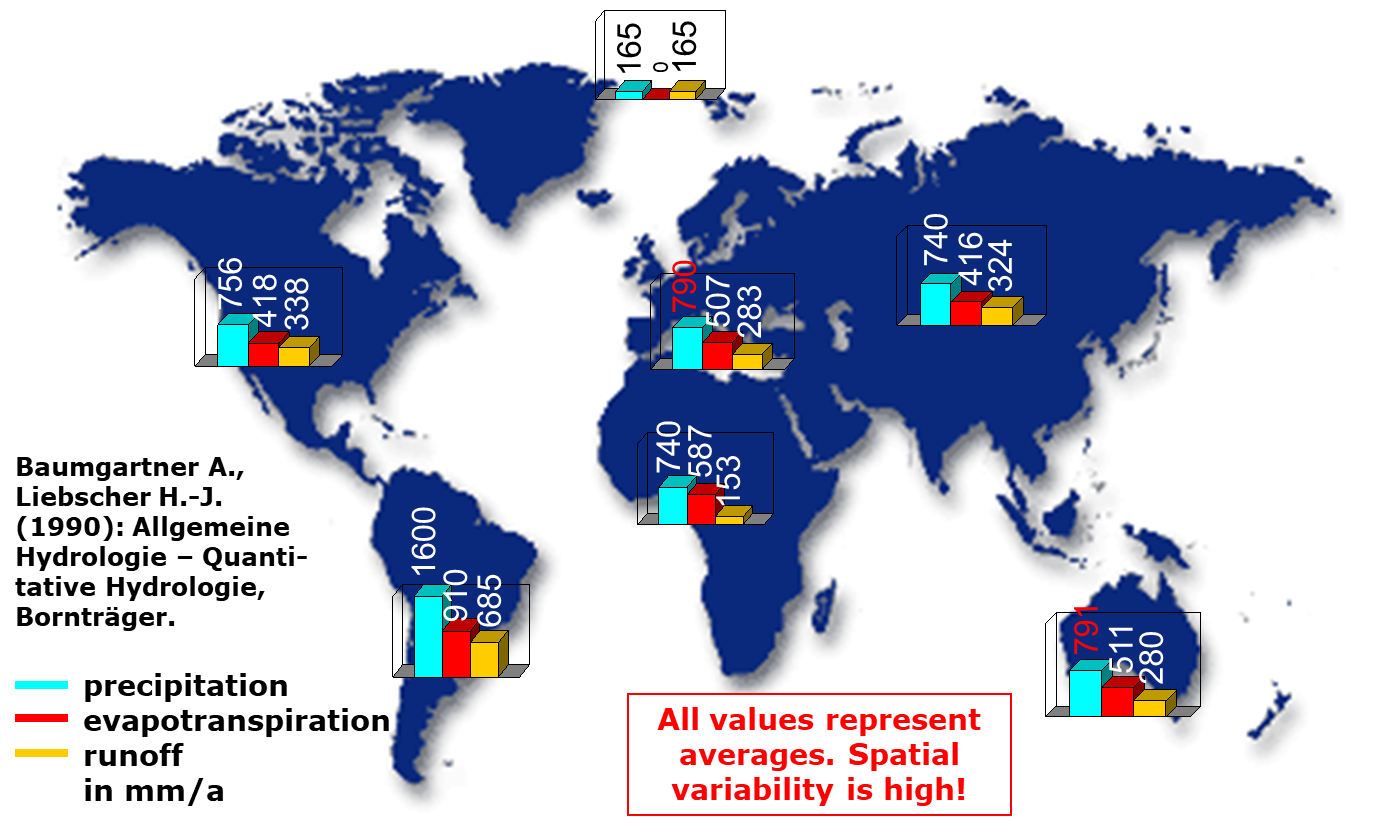

In [6]:
#gif_pane = pn.pane.GIF('images/L01_f_2.gif', width=500)
#gif_pane
fig5 = pn.pane.PNG("images/L01_f_5.png", width=600) 
#Video("images/L01_f_3.mp4", width=600, embed=True) 
 

pn1 = pn.pane.Markdown(""" 

### Water balance by continents

Groundwater receives water from the _infiltration_ of **runoff** water. 

""")

pn.Row(pn1, fig5)

In [7]:
A = 4500 # km², catchment area
P = 550 # mm/a, precipitation
ET = 200 # mm/a, evapotranspiration
Qout_surf = 40 # m³/s, surface runoff
Delta_V = 0 # m³, change in volume = 0 Steady-state conditions

#Volume budget in this example: P·A = ET·A + Qout,surf + Qout,sub

#Step 1    
Qin = P*A*10**3  #m³/a, 10^3 for unit conversion

#step 2: 
ET_A = ET*A*10**3 #m³/a, 10^3 for unit conversion

#Step 3: 
Qout_surf = Qout_surf *365*24*3600 #  m³/a

# step 4:
Qout_sub = Qin - ET_A - Qout_surf # m³/a 



print("The rate of inflow, Qin is {0:1.1E}".format(Qin),"m\u00b3/a \n"); print("The outflow rate due to Evapotranspiration is {0:1.1E}".format(ET_A),"m\u00b3/a \n")
print("The surface outflow rate, Q_out_surf in m\u00b3/a is {0:1.1E}".format(Qout_surf),"m\u00b3/a \n");print("The subsurface outflow rate, Qout_surf in m\u00b3/a is {0:1.1E}".format(Qout_sub),"m\u00b3/a \n")

The rate of inflow, Qin is 2.5E+09 m³/a 

The outflow rate due to Evapotranspiration is 9.0E+08 m³/a 

The surface outflow rate, Q_out_surf in m³/a is 1.3E+09 m³/a 

The subsurface outflow rate, Qout_surf in m³/a is 3.1E+08 m³/a 



In [8]:
def mass_bal(n_simulation, MA, MB, MC, R_A, R_B):
    
    A = np.zeros(n_simulation)
    B = np.zeros(n_simulation)
    C = np.zeros(n_simulation) 
    time  = np.arange(n_simulation)
    
    for i in range(0,n_simulation-1):
        A[0] = MA
        B[0] = MB
        C[0] = MC
        A[i+1] = A[i]-R_A*A[i]
        B[i+1] = B[i]+R_A*A[i]-R_B*B[i] 
        C[i+1] = C[i]+R_B*B[i]
        summ = A[i]+B[i]+C[i]
        
    d = {"Mass_A": A, "Mass_B": B, "Mass_C": C, "Total Mass": summ}
    df = pd.DataFrame(d) # Generating result table
    label = ["Mass A (g)", "Mass B (g)", "Mass C (g)"]
    fig = plt.figure(figsize=(6,4))
    plt.plot(time, A, time, B, time, C, linewidth=3);  # plotting the results
    plt.xlabel("Time [Time Unit]"); plt.ylabel("Mass [g]") # placing axis labels
    plt.legend(label, loc=0);plt.grid(); plt.xlim([0,20]); plt.ylim(bottom=0) # legends, grids, x,y limits
    plt.show() # display plot
    
    df_pane = pn.pane.DataFrame(df)
    return print(df.round(2)) 

N = widgets.BoundedIntText(value=20,min=0,max=100,step=1,description= '&Delta; t (day)',disabled=False)

A = widgets.BoundedFloatText(value=100,min=0,max=1000.0,step=1,description='M<sub>A</sub> (kg)',disabled=False)

B = widgets.BoundedFloatText(value=5,min=0,max=1000.0,step=1,description='M<sub>B</sub> (kg)',disabled=False)

C = widgets.BoundedFloatText(value=10,min=0,max=1000,step=0.1,description='M<sub>C</sub> (kg)',disabled=False)

RA = widgets.BoundedFloatText(value=0.2,min=0,max=100,step=0.1,description='R<sub>A</sub> (day<sup>-1 </sup>)',disabled=False)

RB = widgets.BoundedFloatText(value=0.2,min=0,max=100,step=0.1,description='R<sub>B</sub> (day<sup>-1 </sup>)',disabled=False)


interactive_plot = widgets.interactive(mass_bal, n_simulation = N, MA=A, MB=B, MC=C, R_A=RA, R_B=RB,)
output = interactive_plot.children[-1]  
#output.layout.height = '350px'
interactive_plot


interactive(children=(BoundedIntText(value=20, description='&Delta; t (day)'), BoundedFloatText(value=100.0, d…